In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read files
train=pd.read_csv('bigdatamart_train.csv')
test=pd.read_csv('bigdatamart_test.csv')

In [3]:
train.shape,test.shape

((8523, 12), (2900, 11))

In [4]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  514
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      1
Outlet_Size                  830
Outlet_Location_Type           1
Outlet_Type                    1
dtype: int64

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
categorical=train.select_dtypes(include=[np.object])
print('categorical features:',categorical.shape[1])
numerical=train.select_dtypes(include=[np.float64,np.int64])
print('numerical features:',numerical.shape[1])

categorical features: 7
numerical features: 5


In [7]:
categorical=test.select_dtypes(include=[np.object])
print('categorical features:',categorical.shape[1])
numerical=test.select_dtypes(include=[np.float64,np.int64])
print('numerical features:',numerical.shape[1])

categorical features: 7
numerical features: 4


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


observations: 1)count value of item _Weight and item_outlet sales is less so we can say there must be mising values present 2)the mean value of item visibility cant be zero as it is there in it 3)in outlet estabilshment year from min to max it is varrying ununiformly



In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,2386.000000,2900.000000,2900.000000,2899.000000
mean,12.658080,0.064988,140.843040,1997.922042
std,4.683782,0.051795,61.428379,8.479024
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.026506,95.525200,1987.000000
50%,12.300000,0.052380,141.765400,1999.000000
75%,16.700000,0.092300,185.635150,2004.000000
max,21.350000,0.323637,266.322600,2009.000000


In [10]:
# data cleaning
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
#checking missing values 
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  514
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      1
Outlet_Size                  830
Outlet_Location_Type           1
Outlet_Type                    1
dtype: int64

Item weight and outlet size having missing values

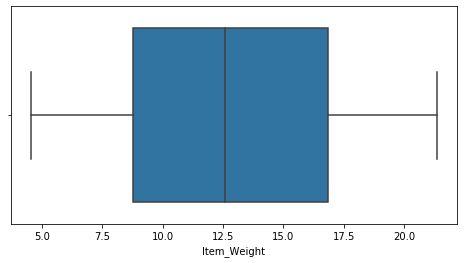

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot('Item_Weight',data=train)

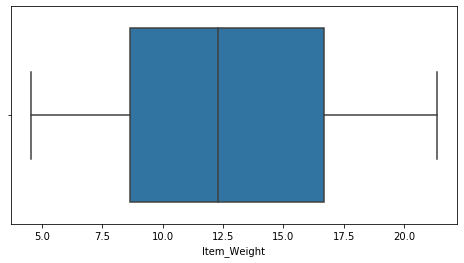

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot('Item_Weight',data=test)

boxplot has no outliers so we can replace missing values with mean

In [15]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [16]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [17]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
test['Outlet_Size'].value_counts()

Medium    967
Small     797
High      306
Name: Outlet_Size, dtype: int64

since the outlet size is categorical we can replace missing values with mode

In [19]:
mode_category=train['Outlet_Size'].mode()[0]
train['Outlet_Size'].fillna(mode_category,inplace=True)

In [20]:
mode_category=test['Outlet_Size'].mode()[0]
test['Outlet_Size'].fillna(mode_category,inplace=True)

In [21]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    1
Outlet_Size                  0
Outlet_Location_Type         1
Outlet_Type                  1
dtype: int64

In [23]:
test.dropna(inplace=True)

In [24]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
#EDA
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF belong to Low Fat ,reg to regular ,low fat to Low Fat

In [27]:
train.Item_Fat_Content=train.Item_Fat_Content.replace('LF','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace('low fat','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace('reg','Regular')

In [28]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
test.Item_Fat_Content.value_counts()

Low Fat    1747
Regular     978
LF          101
low fat      38
reg          35
Name: Item_Fat_Content, dtype: int64

In [30]:
test.Item_Fat_Content=test.Item_Fat_Content.replace('LF','Low Fat')
test.Item_Fat_Content=test.Item_Fat_Content.replace('low fat','Low Fat')
test.Item_Fat_Content=test.Item_Fat_Content.replace('reg','Regular')

In [31]:
test.Item_Fat_Content.value_counts()

Low Fat    1886
Regular    1013
Name: Item_Fat_Content, dtype: int64

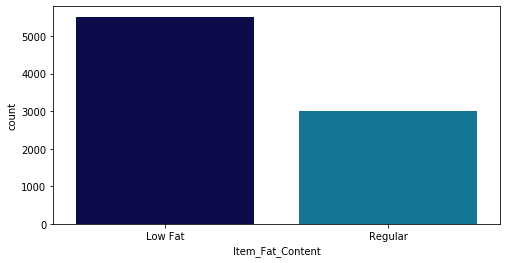

In [32]:
#univariate analysis
#1)Item_Fat_Content
plt.figure(figsize=(8,4))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

observations:items bought are more of low fat

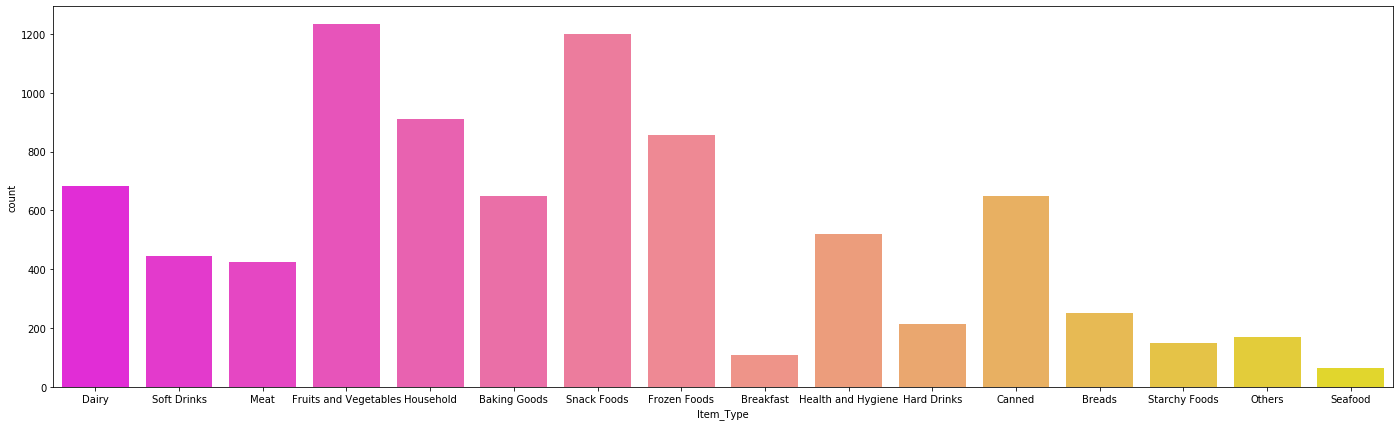

In [33]:
#2)item type
plt.figure(figsize=(24,7))
sns.countplot('Item_Type',data=train,palette='spring')

fruits and vegetables,snack food have more sales

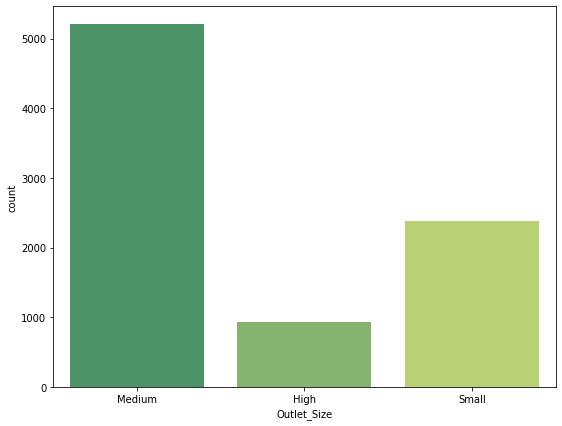

In [34]:
#3)outlet_size
plt.figure(figsize=(9,7))
sns.countplot('Outlet_Size',data=train,palette='summer')

more outlets are medium in size

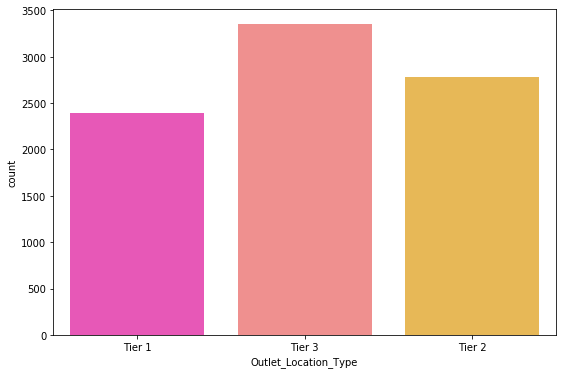

In [35]:
#4)outlet location type
plt.figure(figsize=(9,6))
sns.countplot('Outlet_Location_Type',data=train,palette='spring')

more oulet locations are of tier3

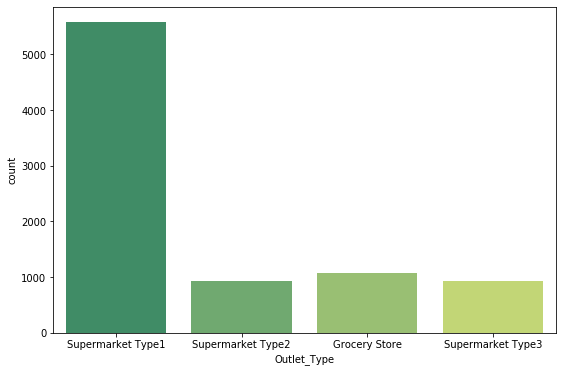

In [36]:
#5)Outlet_Type
plt.figure(figsize=(9,6))
sns.countplot('Outlet_Type',data=train,palette='summer')


outlets are moe of type1

In [37]:
#Bivariate analysis
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

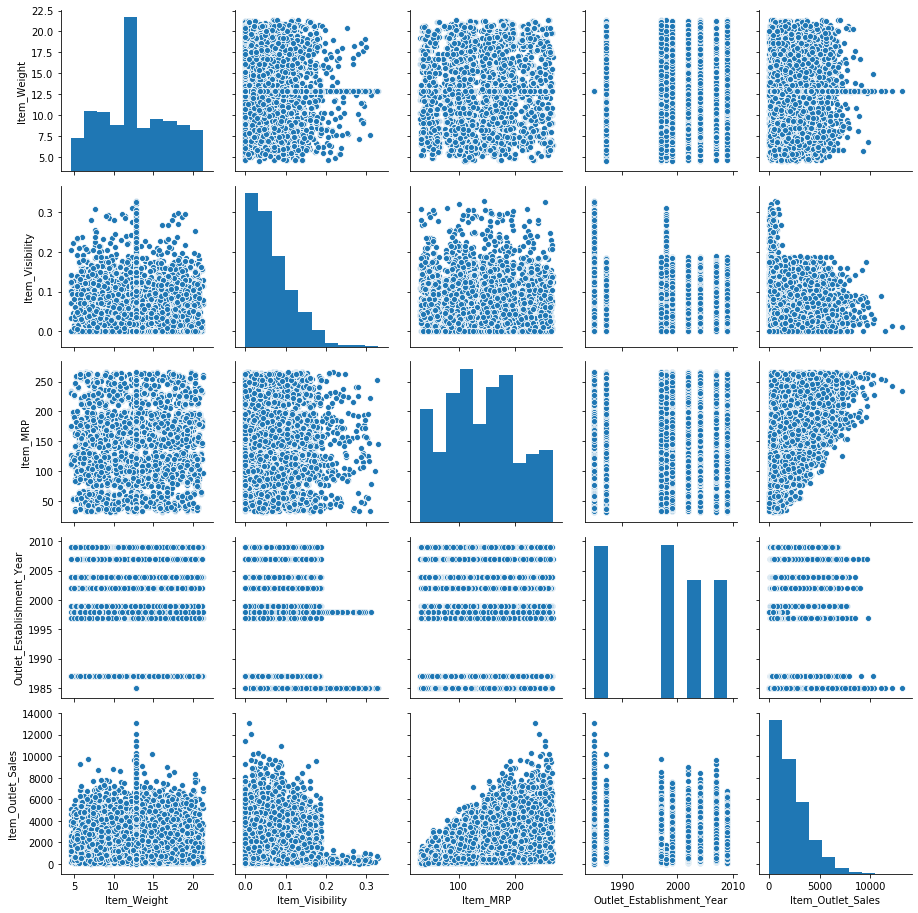

In [38]:
sns.pairplot(data=train)

In [39]:
#item visibility is rightly skewed

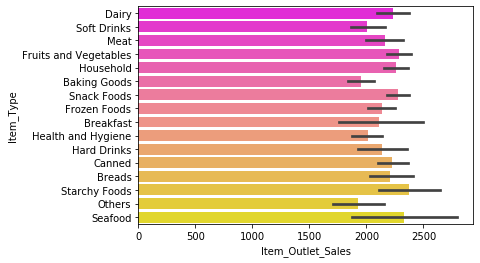

In [40]:
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='spring')

#products available were fruits and vegetables,snacks but seafood and starchy food seems higher and hence sales can be improved by providing these nonstock products

Text(0, 0.5, 'Item_Outlet_Sales')

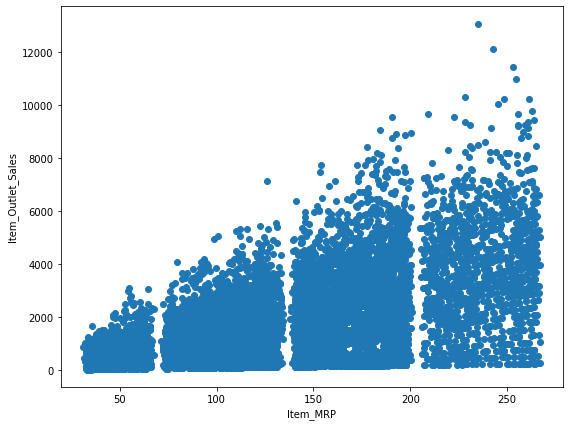

In [41]:
plt.figure(figsize=(9,7))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item_MRP''')
plt.ylabel('Item_Outlet_Sales')

more sales are in the range of 200-250

Text(0, 0.5, 'Item_Outlet_Sales')

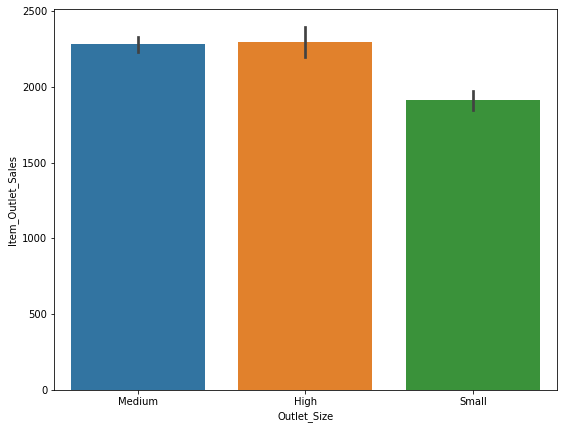

In [42]:
plt.figure(figsize=(9,7))
sns.barplot(y='Item_Outlet_Sales',x='Outlet_Size',data=train)
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')

medium and high size outlet having more sales

Text(0, 0.5, 'Item_Outlet_Sales')

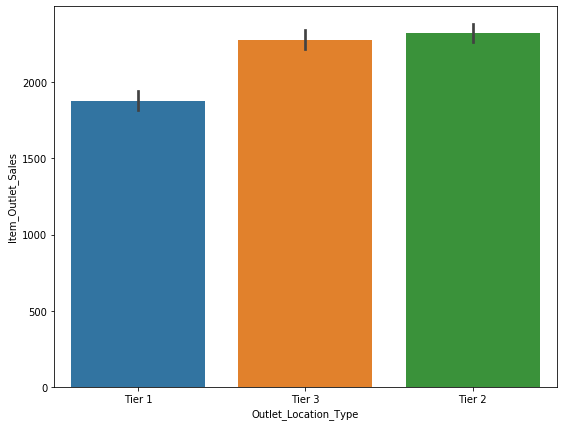

In [43]:
plt.figure(figsize=(9,7))
sns.barplot(y='Item_Outlet_Sales',x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')

sales tend to high for tier3 and tier2 location

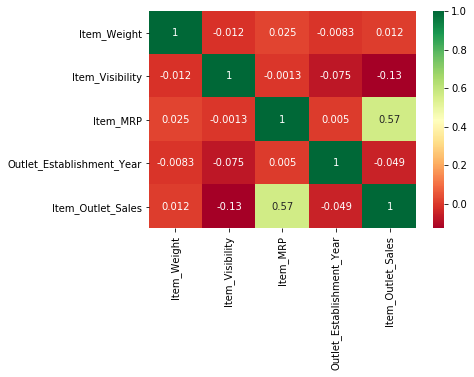

In [46]:
#lets find a correlation
top_corr_features=train.corr()
sns.heatmap(top_corr_features,annot=True,cmap='RdYlGn')

#here we can drop outlet establishment year as this is less correlated with target

In [47]:
train.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [48]:
train.shape

(8523, 11)

In [49]:
test.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [50]:
test.shape

(2899, 10)

In [51]:
#feature engineering
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [52]:
#converting categorical into numerical forms using label encoder
list=['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Item_Type']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in list:
    train[i]=lb.fit_transform(train[i])
for i in list:
    test[i]=lb.fit_transform(test[i])


In [53]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,0,2,1,994.7052


In [54]:
#there are some columns we need to drop it 
train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)


In [55]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [56]:
x=train.iloc[:,:-1]
x.shape

(8523, 8)

In [57]:
y=train['Item_Outlet_Sales']
y.shape

(8523,)

In [58]:
#lets split into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [59]:
#feature scaling
#standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

lets apply machine learning algorithm


In [60]:
#Linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.5197353267143752
mean squared error: 1305345.0060437878
RSME: 1142.5169609435948


In [61]:
lr.coef_

array([ -11.31899662,   31.71739409,  -85.83786502,    0.98851786,
        977.54069434, -210.53294846, -343.93368747,  791.67302897])

In [62]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predr=rf.predict(x_test)
print("r2 score:",r2_score(y_test,y_predr))
print("mean squared error:",mean_squared_error(y_test,y_predr))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_predr)))

r2 score: 0.5715072803673491
mean squared error: 1164630.3857247366
RSME: 1079.180423156729


In [63]:
# will reduce the coefficient to zero( those features are not informative)
#alpha values could be ....>0.0001,0.001,.01..1,1,10....> higher valiues reduce the coefficient values
ls=Lasso(alpha=0.0001)
#alpha is 1.0 default
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
pred=ls.predict(x_test)

0.503765143811538


In [64]:
ls.coef_

array([ -11.31889143,   31.71727754,  -85.83780892,    0.98840566,
        977.54059291, -210.53265922, -343.93331103,  791.67281991])

In [65]:
# try to minimize the coefficient variance
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
pred=rd.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,pred))

0.5037651438115841
mean absolute error: 865.491715689092


In [66]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.52554065 0.50430961 0.48997642 0.50583238 0.5045793 ]
0.5060476730056802 0.011344467702221476


In [67]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.55893748 0.53825476 0.51762938 0.54603761 0.55358027]
0.5428878984585896 0.014431184218039312


[0.05938995 0.01807718 0.09657013 0.06888962 0.4449099  0.02579313
 0.02358806 0.26278203]


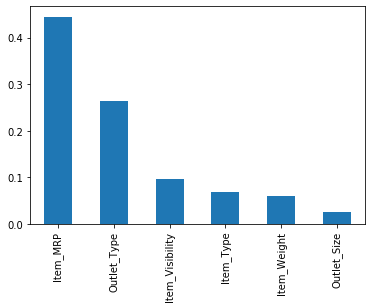

In [68]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
# plot graph of feature importances for better visualiation
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(6).plot(kind='bar')  # we are observing top 6 features
plt.show()

HYPERPARAMETER TUNNING

In [69]:
from sklearn.model_selection import RandomizedSearchCV
# randomized search cv
#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [70]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [71]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='r2',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [72]:
rf_random

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  17.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  21.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [74]:
predictions=rf_random.predict(x_test)
predictions

array([1264.37492273,  742.70727223,  672.70275716, ...,  663.36473461,
        785.43970954, 1973.28947867])

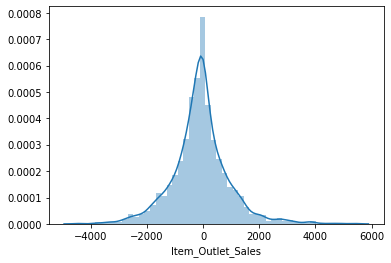

In [75]:
sns.distplot(y_test-predictions)

distribution is normal so predictions are  pretty good

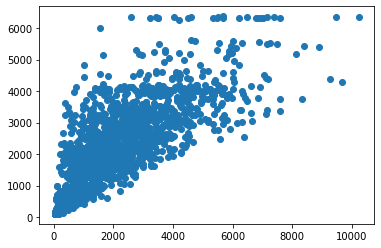

In [76]:
plt.scatter(y_test,predictions)

In [77]:
from sklearn.externals import joblib
joblib.dump(rf_random,'Bigmartsales.pkl')

['Bigmartsales.pkl']